# 6- Neural Networks
- Play with [Andrew Karpathy's ConvnetJS Demo](https://cs.stanford.edu/people/karpathy/convnetjs/demo/classify2d.html)
- Play with [TensorFlow Playground](https://playground.tensorflow.org)

In [1]:
# Load the dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
# Scale images from [0,255] to [0,1]
x_train_normalized = x_train / 255.0

In [3]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib nbagg
# %matplotlib ipympl
# %matplotlib notebook

In [4]:
import numpy as np
# Sample a smaller dataset for testing
rand_idx = np.random.choice(x_train.shape[0], 10000)
x_train = x_train_normalized[rand_idx]
y_train = y_train[rand_idx]
x_train.shape

(10000, 28, 28)

In [5]:
# Tensorflow is a CPU/GPU/TPU front and backend computational library
# Keras is a higher level API, both developped by Google.
import tensorflow as tf
import keras
fc_model = '** Add your code here **'

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
# We compile the model as a Tensorflow computational Graph
fc_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
fc_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


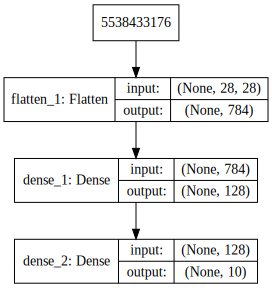

In [7]:
# We can display the model architecture
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(fc_model, show_shapes=True).create(prog='dot', format='svg'))

In [20]:
# We train the model
history = fc_model.fit(
    x_train, y_train, validation_split=0.2, batch_size=16, epochs=5, verbose=1)  # Not enough training

Train on 8000 samples, validate on 2000 samples
Epoch 1/5
8000/8000 [==============================] - 1s 109us/step - loss: 1.2880e-05 - acc: 1.0000 - val_loss: 0.0027 - val_acc: 0.9990
Epoch 2/5
8000/8000 [==============================] - 1s 106us/step - loss: 1.1048e-05 - acc: 1.0000 - val_loss: 0.0035 - val_acc: 0.9985
Epoch 3/5
8000/8000 [==============================] - 1s 110us/step - loss: 9.1030e-06 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 0.9980
Epoch 4/5
8000/8000 [==============================] - 1s 144us/step - loss: 7.6448e-06 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9980
Epoch 5/5
8000/8000 [==============================] - 1s 152us/step - loss: 6.5203e-06 - acc: 1.0000 - val_loss: 0.0054 - val_acc: 0.9975


In [17]:
# We evaluate the model performance
test_loss, test_acc = fc_model.evaluate(x_test, y_test)
print('Test loss: %0.3f' % test_loss, 'Test accuracy: %0.3f' % test_acc)

10000/10000 [==============================] - 0s 18us/step
Test loss: 0.662 Test accuracy: 0.959


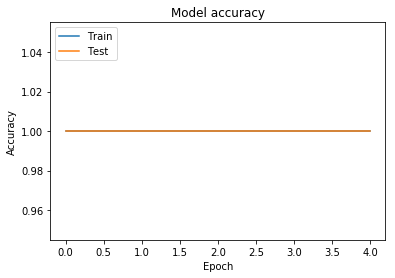

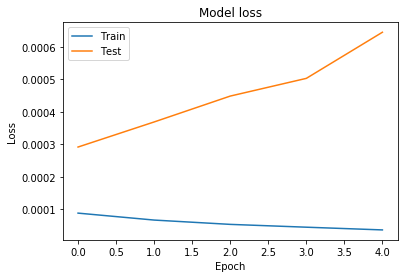

In [18]:
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
plot_training_history(history)